In [1]:
probeDict = {
    "VISp"  : ["PrimaryVisualCortex (V1)", 0],
    "VISl"  : ["LateroMedial (LM)", 0],
    "VISrl" : ["RostroLateral (RL)", 0],
    "VISal" : ["AnteroLateral (AL)", 0],
    "VISpm" : ["PosteroMedial (PM)", 0],
    "VISam" : ["AnteroMedial (AM)", 0],
    "LP"    : ["LateralPosteriorNuc (LP)", 0],
    "LGd"   : ["LateralGeniculateNuc (LGn)", 0]
}

In [2]:
allProbes = list(probeDict.keys())

In [3]:
import numpy as np
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
featuresDF = pd.read_csv('/home/amirali/Desktop/Thesis/Codes/LuminanceContrastSF.csv')
labelsDF   = pd.read_csv('/home/amirali/Desktop/Thesis/Codes/labels.csv')

In [5]:
LLuminanceImages = featuresDF.LLuminance.values.astype('int')
HLuminanceImages = featuresDF.HLuminance.values.astype('int')
LContrastImages  = featuresDF.LContrast.values.astype('int')
HContrastImages  = featuresDF.HContrast.values.astype('int')
LSFImages        = featuresDF.LSF.values.astype('int')
HSFImages        = featuresDF.HSF.values.astype('int')
nonanimateImages = np.array([31, 61, 70, 72, 86, 89, 67, 85, 87, 91, 64, 78, 83, 84, 93])
animateImages    = np.array([0, 8, 9, 17, 22, 32, 34, 46, 47, 11, 27, 6, 12, 16, 54])

In [6]:
dataPath = '/home/amirali/Desktop/Thesis/Codes/unit_data/Data/'

In [7]:
def svm(first_data, second_data, n_iters, kernel, C):
    first_labels  = np.zeros(first_data.shape[0])
    second_labels = np.ones(second_data.shape[0])
    total_data    = np.concatenate((first_data, second_data), axis=0)
    total_labels  = np.concatenate((first_labels, second_labels))    
    accuracy      = np.zeros((n_iters, total_data.shape[2]))

    for iter in range(accuracy.shape[0]):
        if iter % 20 == 0:
            print("Epoch Number: ", iter)
        X_train, X_test, y_train, y_test = train_test_split(total_data, total_labels, test_size=0.3, stratify=total_labels)
        for t in range(accuracy.shape[1]):
            clf                  = make_pipeline(SVC(kernel=kernel, C=C))
            clf.fit(X_train[:, :, t], y_train)
            y_pred               = clf.predict(X_test[:, :, t])
            accuracy[iter, t]    = accuracy_score(y_test, y_pred)
    
    return accuracy

def apply_pca(in_data):
    # n_components = 50
    out_data = np.zeros((in_data.shape[0],in_data.shape[2]-1, in_data.shape[2]))
    pca = PCA()
    for i in range(in_data.shape[0]):
        out_data[i, :, :] = pca.fit_transform(in_data[i, :, :].T)[:, :-1].T
        # print(np.sum(pca.explained_variance_ratio_))
    # print(out_data.shape)
    return out_data

def probe_data_extractor(probe_name, image_feature, probe_dict, data_path):
    image_number = 0
    for img in image_feature:
        probe_dict[probe_name][1] = 0
        image_path = os.path.join(data_path, str(img))
        for session in os.listdir(image_path):
            session_path = os.path.join(image_path, session)
            probe_path   = os.path.join(session_path, probe_name)
            if os.path.exists(probe_path):
                for data in os.listdir(probe_path):
                    data_dir = os.path.join(probe_path, data)
                    if probe_dict[probe_name][1] == 0:
                        spike_data            = np.load(data_dir)
                        probe_dict[probe_name][1] += 1
                    else:
                        session_data = np.load(data_dir)
                        spike_data   = np.concatenate((spike_data, session_data), axis=0)
        
        if image_number == 0:
            probe_data  = np.zeros((len(image_feature), spike_data.shape[0], spike_data.shape[1]))
        probe_data[image_number, :, :] = spike_data
        image_number += 1
    return probe_data

def plot_accuracy(accuracy, probe, feature):
    acc      = accuracy
    iters    = accuracy.shape[0]
    accuracy = np.mean(acc, axis=0)
    error    = np.std(acc, axis=0) / np.sqrt(iters)
    time     = np.arange(-200, 780, 10)
    
    sns.set()
    plt.figure(figsize=(10, 5))
    plt.plot(time, accuracy, linewidth = 2)
    plt.fill_between(time, accuracy - 3 * error, accuracy + 3 * error, alpha=0.5)
    plt.xlabel('time (ms)')
    plt.ylabel('accuracy')
    plt.ylim(0, 1)
    plt.axvline(x = 0, ymin=0, ymax=1, color = 'r', label = 'stimuli onset', linestyle='dashed')
    plt.legend()
    plt.title('Accuracy of ' + feature +  ' over time for ' + probe)
    plt.savefig('Images/' + feature + '/' + probe + '.png')
    
def save_accuracy(accuracy, probe, feature):
    pathtosave = 'Accuracy/' + feature + '/' + probe + '.npy'
    with open(pathtosave, 'wb') as f:
        np.save(f, accuracy)

Probe Name:  VISp
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISl
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISrl
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISal
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISpm
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISam
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  LP
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  LGd
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80


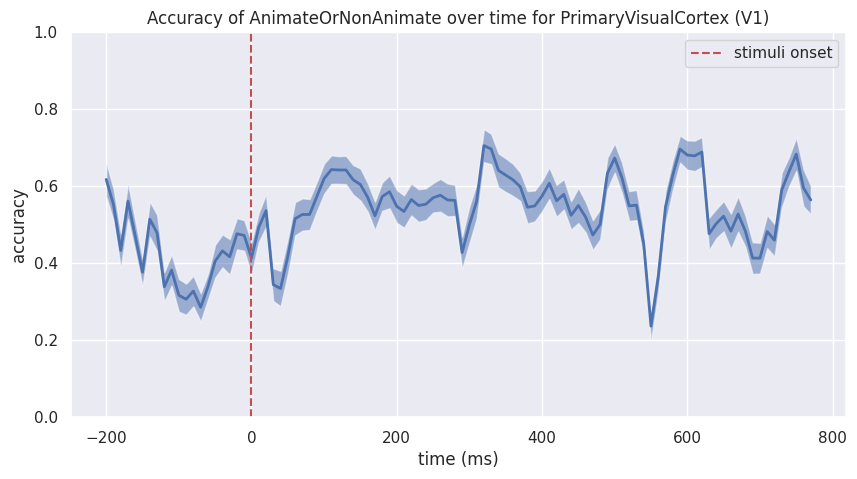

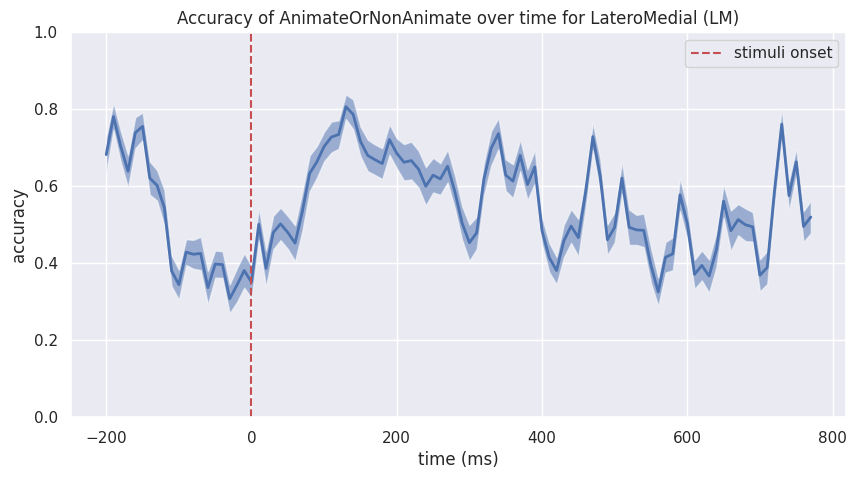

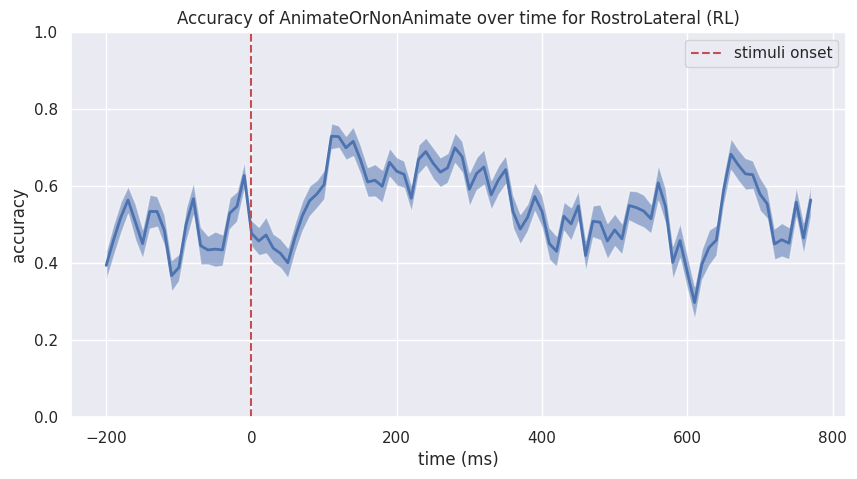

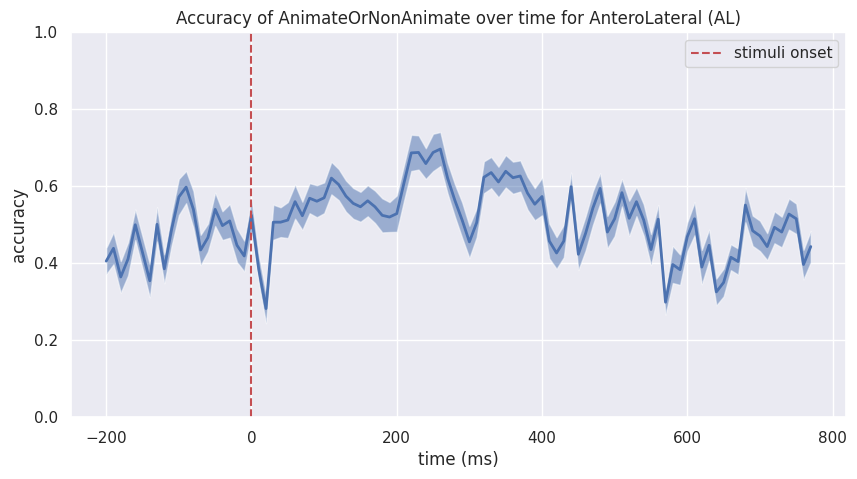

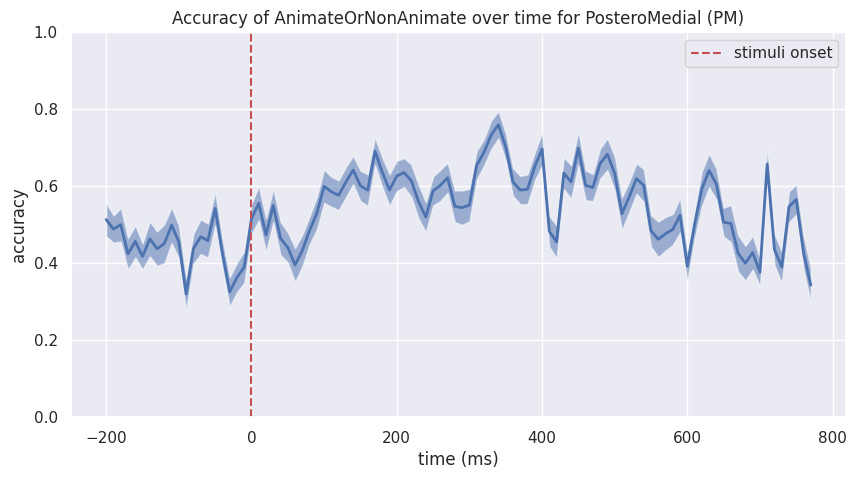

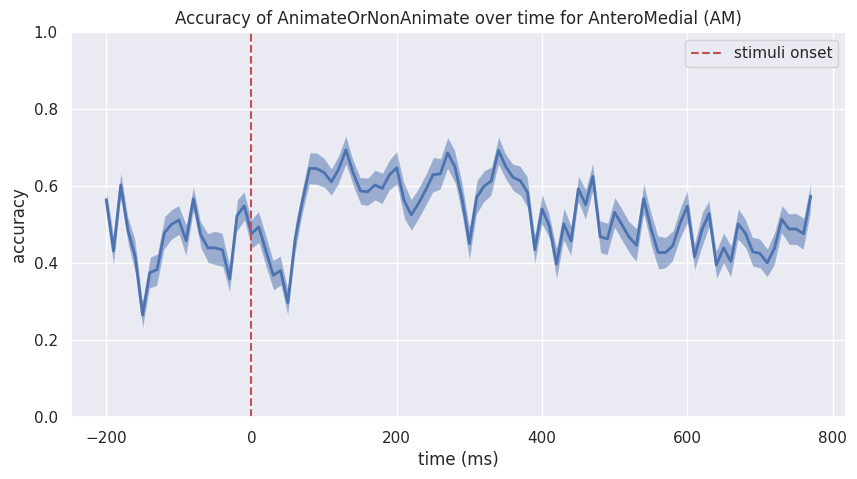

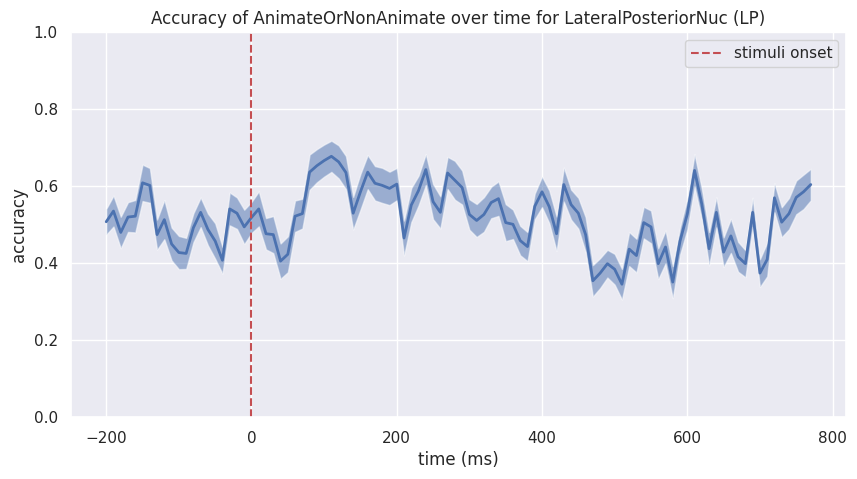

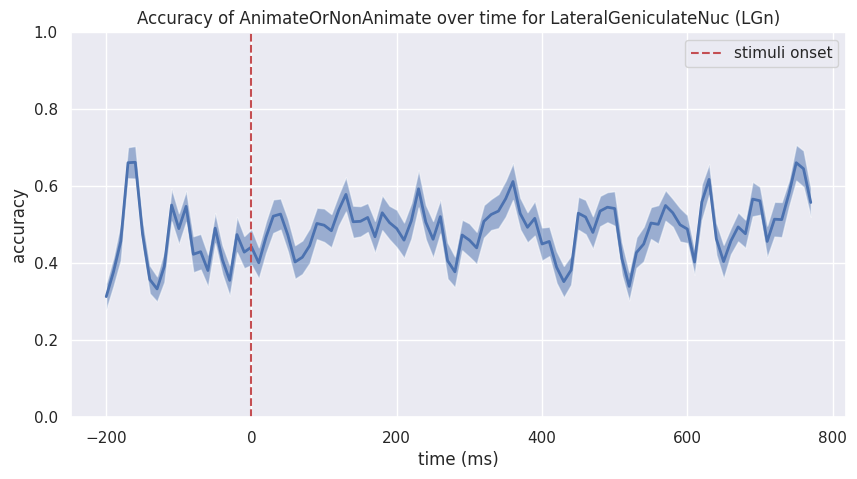

In [8]:
pca = False

for probe in allProbes:
    print("Probe Name: ", probe)
    if pca:
        animateProbeData    = apply_pca(probe_data_extractor(probe_name=probe, image_feature=animateImages, probe_dict=probeDict, data_path=dataPath))
        nonanimateProbeData = apply_pca(probe_data_extractor(probe_name=probe, image_feature=nonanimateImages, probe_dict=probeDict, data_path=dataPath))
    else:
        animateProbeData   = probe_data_extractor(probe_name=probe, image_feature=animateImages, probe_dict=probeDict, data_path=dataPath)
        nonanimateProbeData = probe_data_extractor(probe_name=probe, image_feature=nonanimateImages, probe_dict=probeDict, data_path=dataPath)
    
    animateornonanimateAccuracy   = svm(first_data=animateProbeData, second_data=nonanimateProbeData, n_iters=100, kernel='linear', C=2.5)
    
    plot_accuracy(animateornonanimateAccuracy, probeDict[probe][0], "AnimateOrNonAnimate")
    save_accuracy(animateornonanimateAccuracy, probeDict[probe][0], "AnimateOrNonAnimate")

In [ ]:
pca = False

for probe in allProbes:
    print("Probe Name: ", probe)
    if pca:
        treeProbeData   = apply_pca(probe_data_extractor(probe_name=probe, image_feature=treeImages, probe_dict=probeDict, data_path=dataPath))
        felineProbeData = apply_pca(probe_data_extractor(probe_name=probe, image_feature=felineImages, probe_dict=probeDict, data_path=dataPath))
    else:
        treeProbeData   = probe_data_extractor(probe_name=probe, image_feature=treeImages, probe_dict=probeDict, data_path=dataPath)
        felineProbeData = probe_data_extractor(probe_name=probe, image_feature=felineImages, probe_dict=probeDict, data_path=dataPath)
    
    treeorfelineAccuracy   = svm(first_data=treeProbeData, second_data=felineProbeData, n_iters=100, kernel='rbf', C=2.5)
    
    plot_accuracy(treeorfelineAccuracy, probeDict[probe][0], "TreeOrFeline")

Probe Name:  VISp
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISl
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISrl
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Probe Name:  VISal
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
E

/home/amirali/.local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Probe Name:  LGd
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80
Epoch Number:  0
Epoch Number:  20
Epoch Number:  40
Epoch Number:  60
Epoch Number:  80


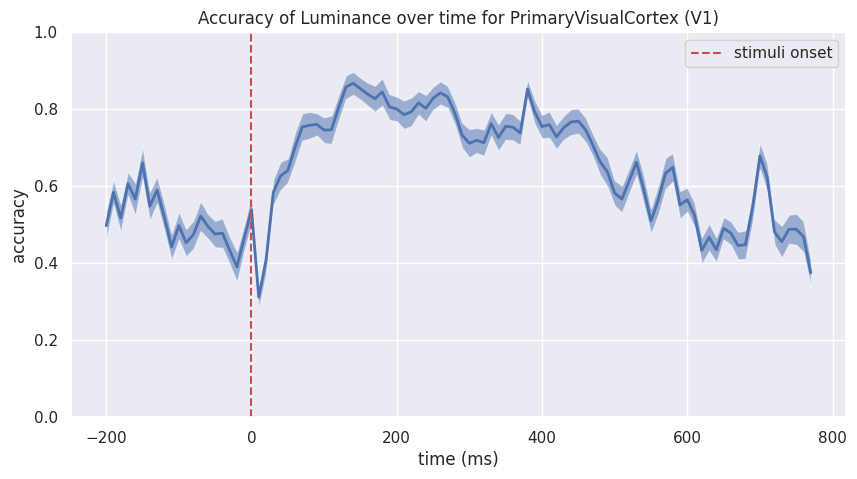

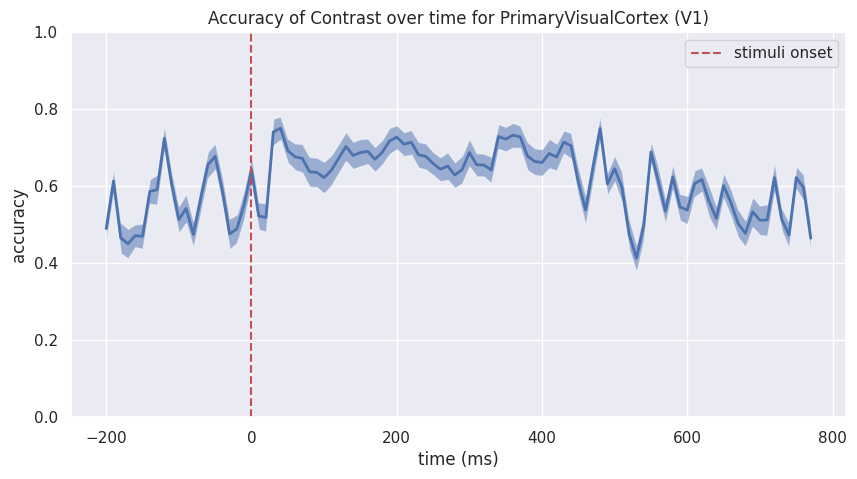

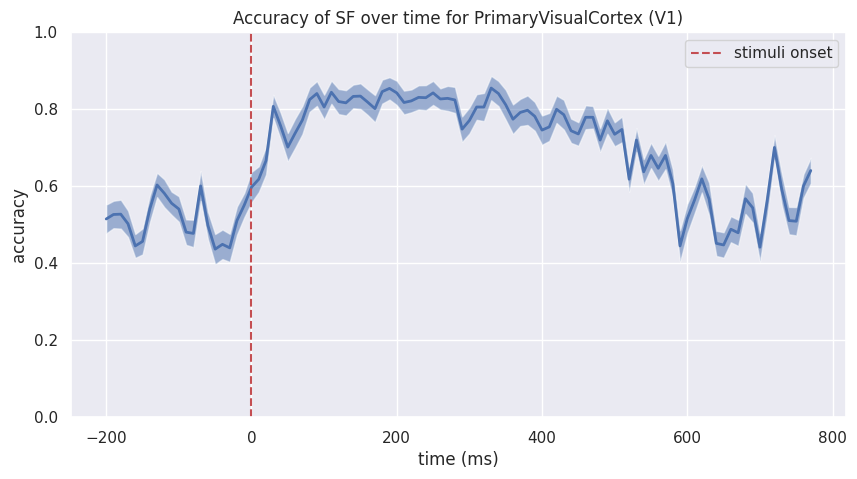

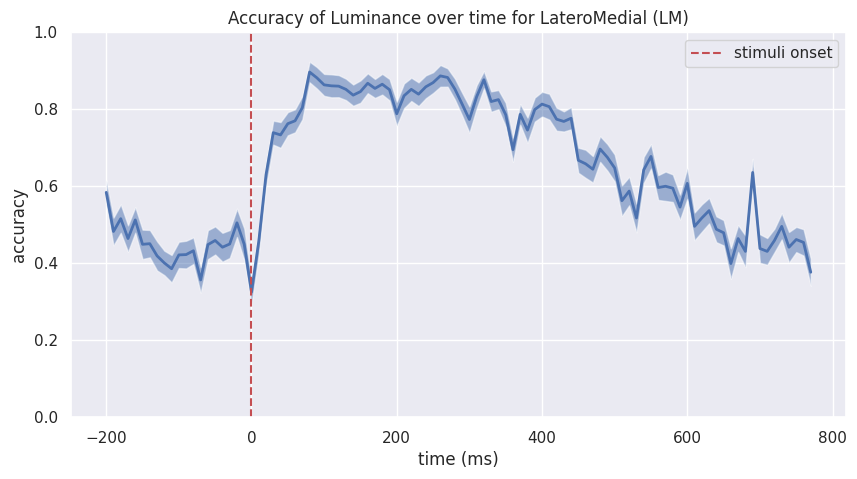

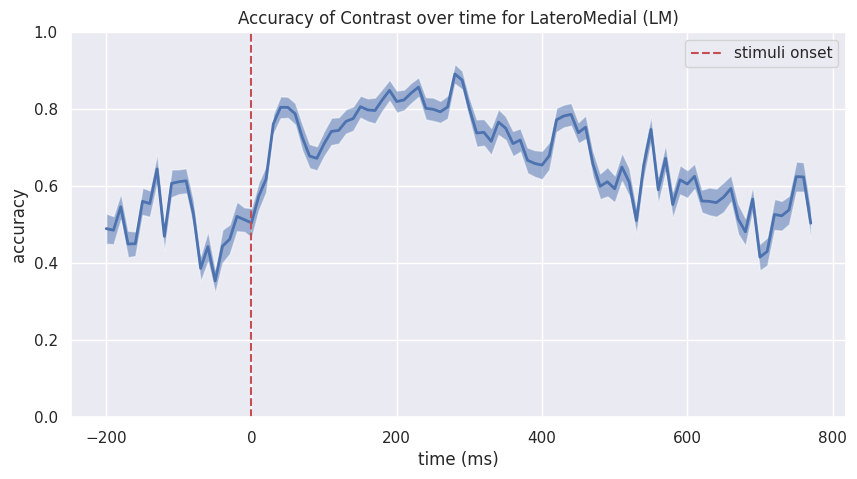

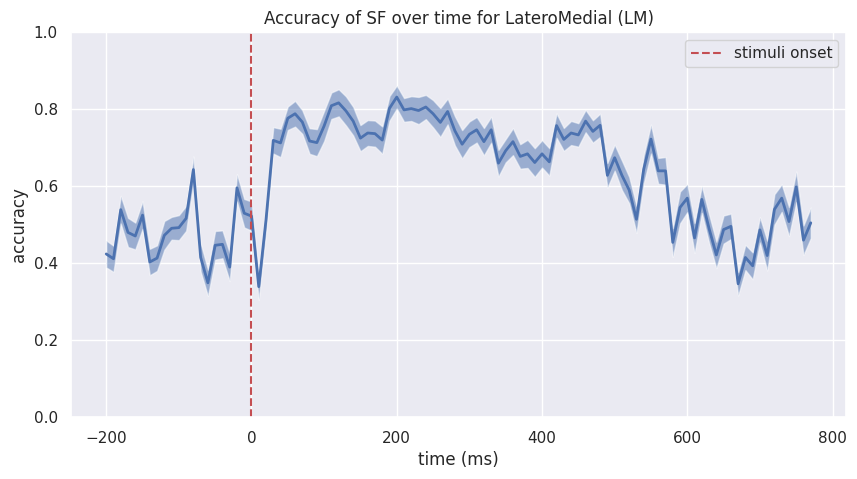

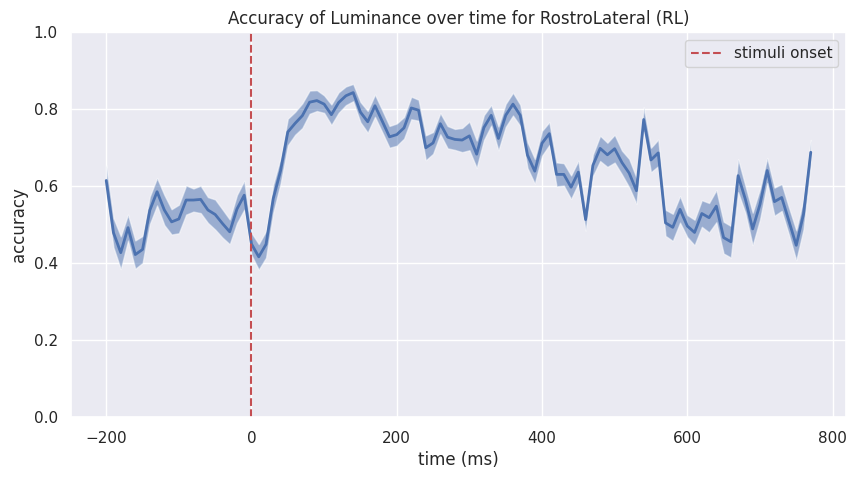

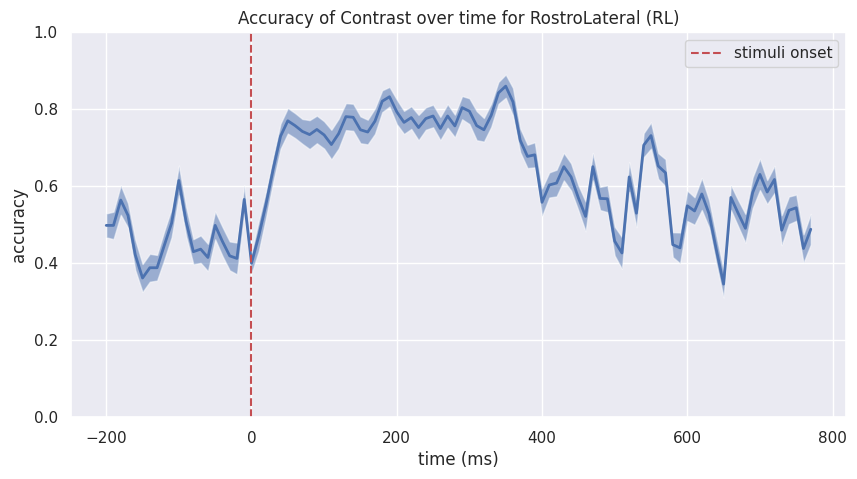

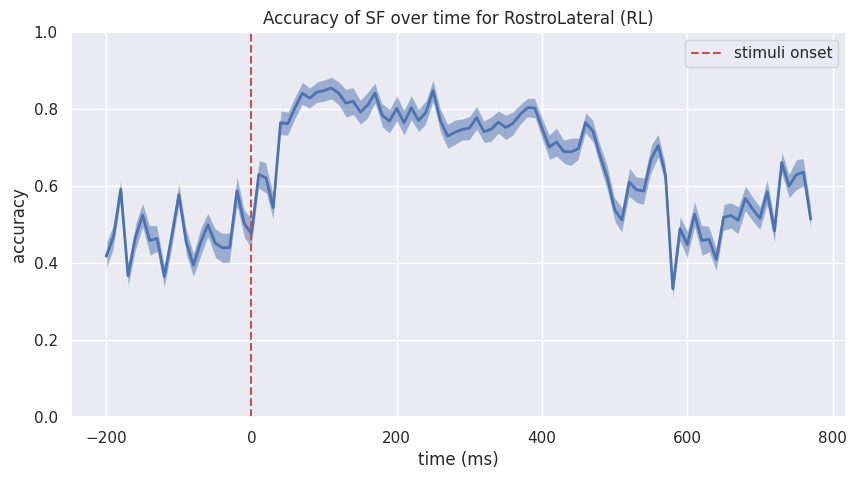

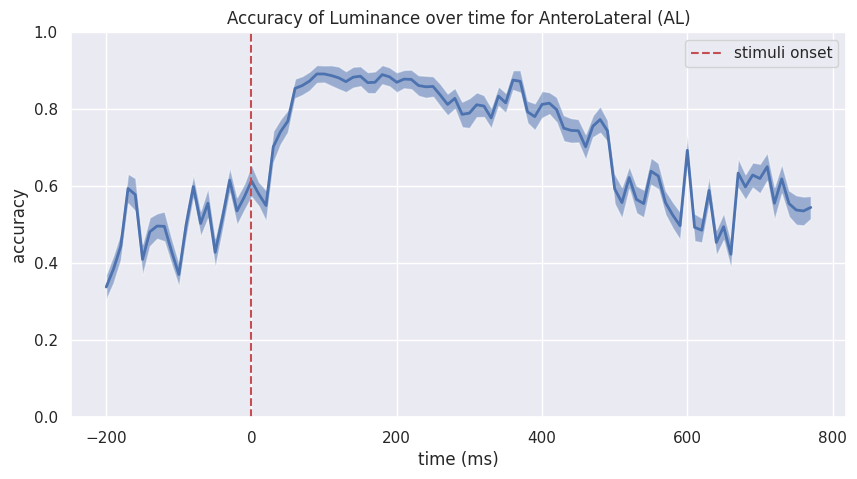

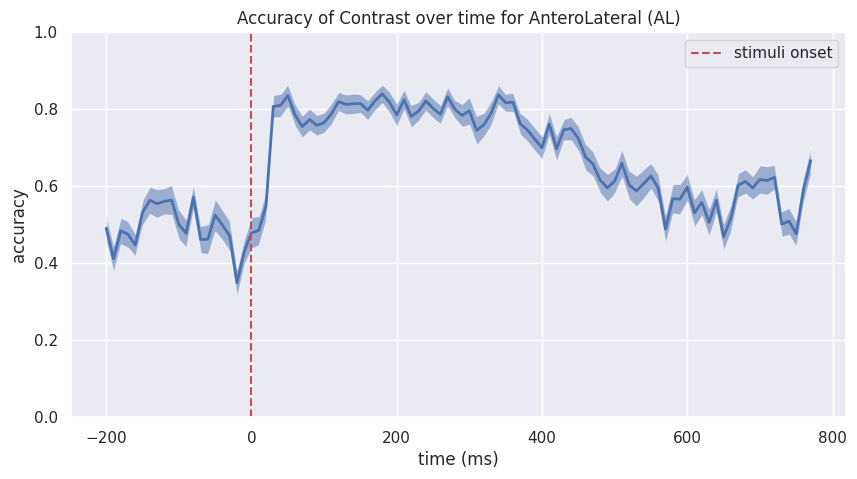

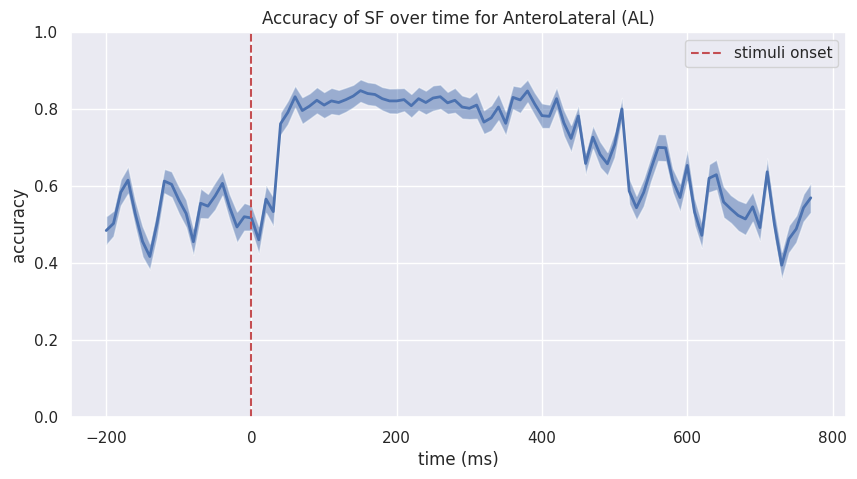

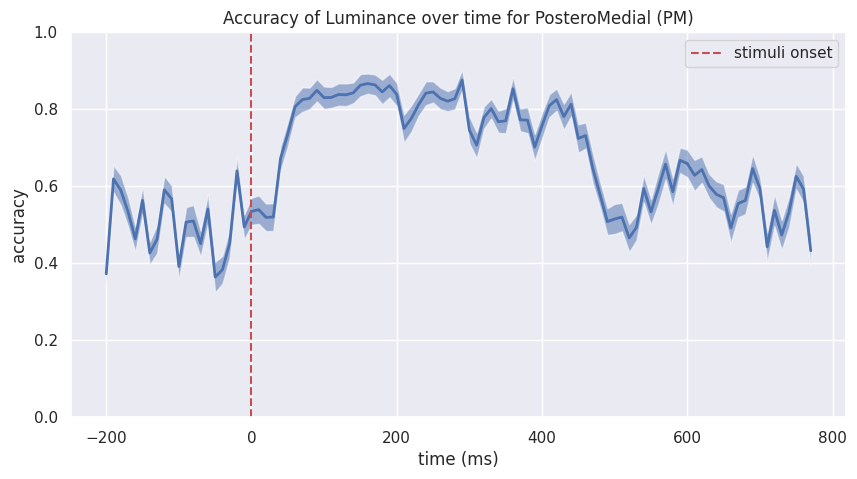

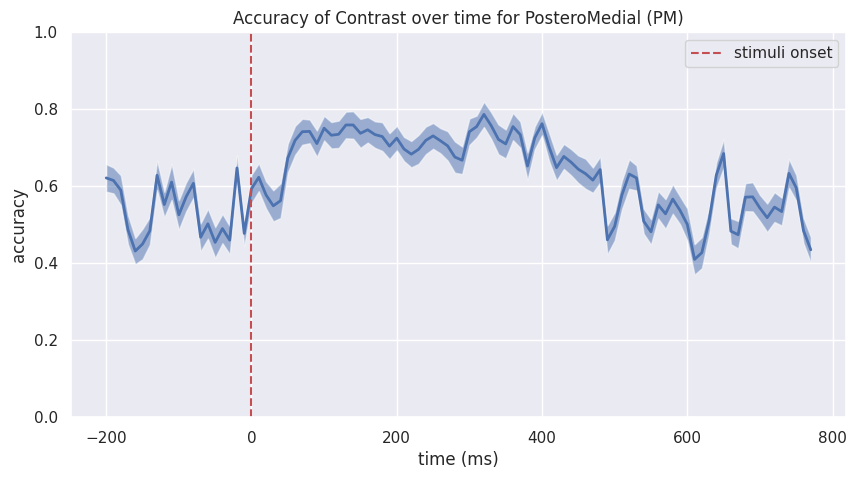

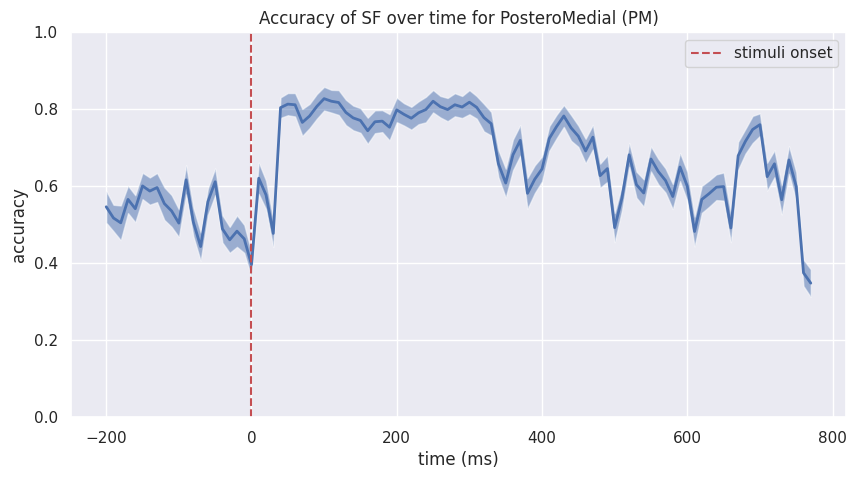

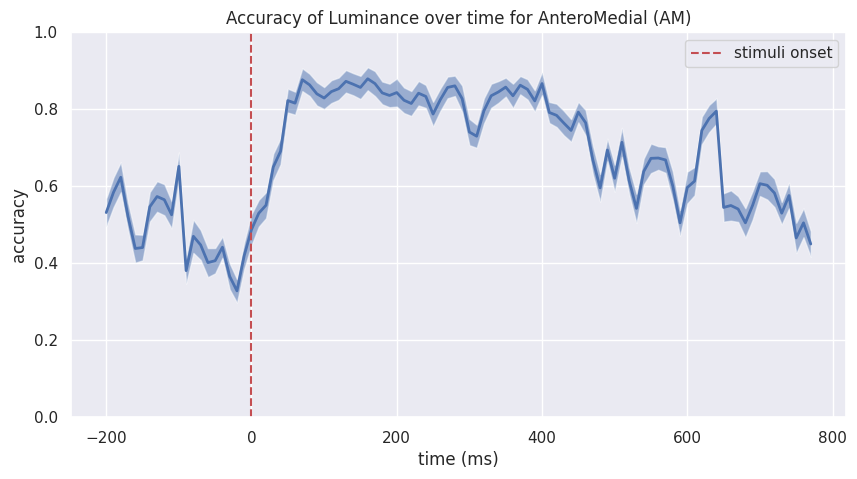

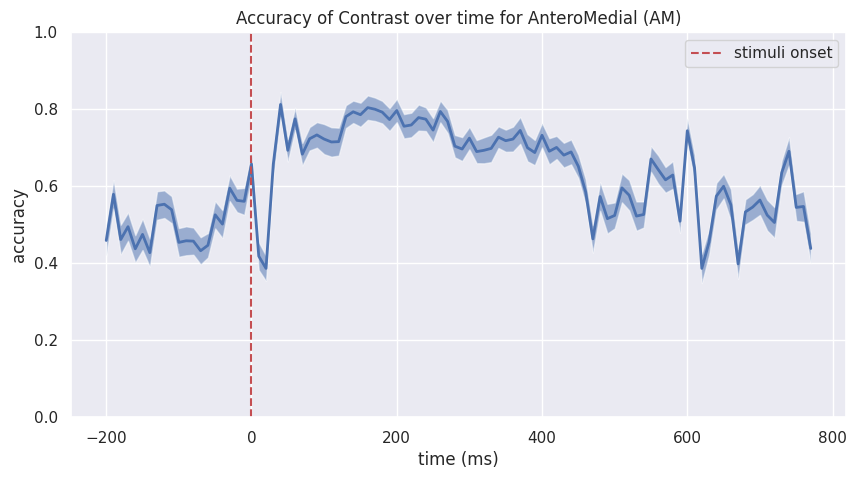

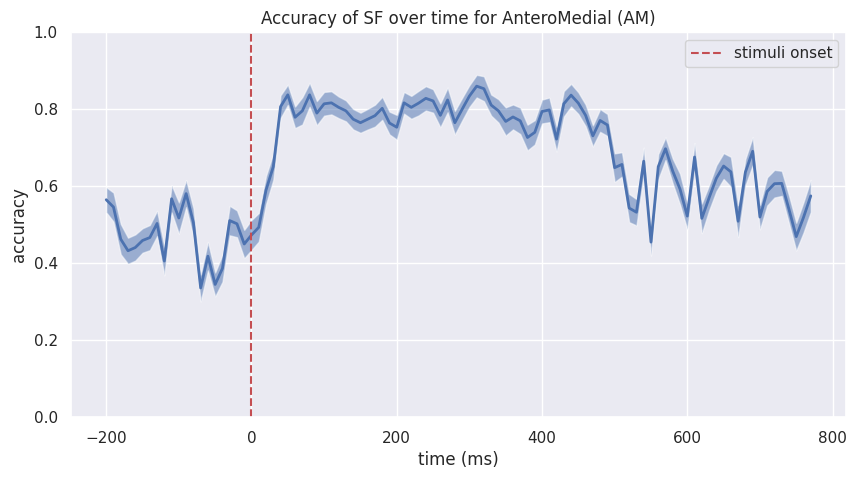

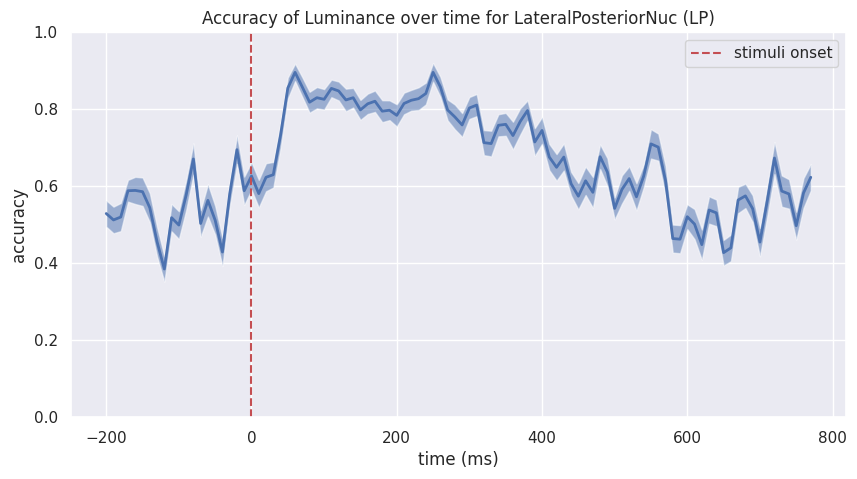

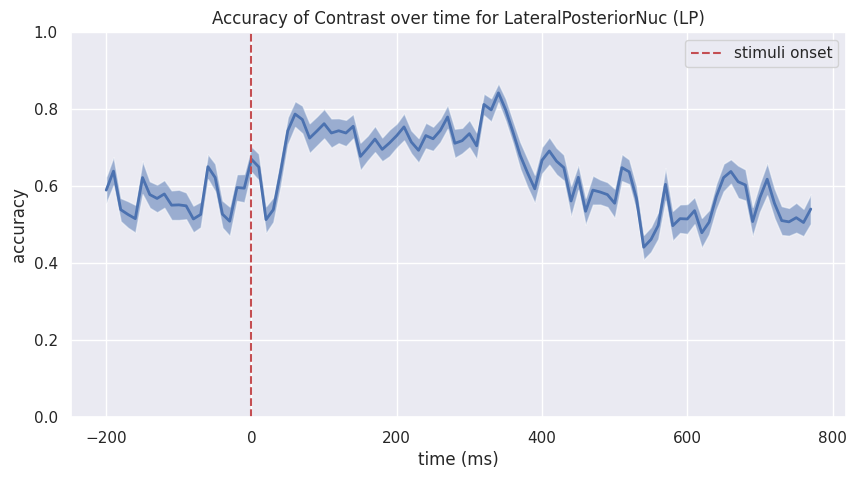

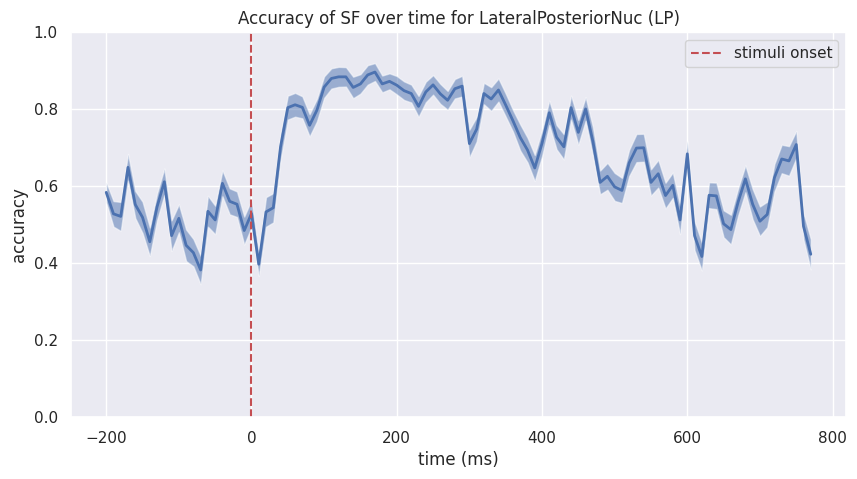

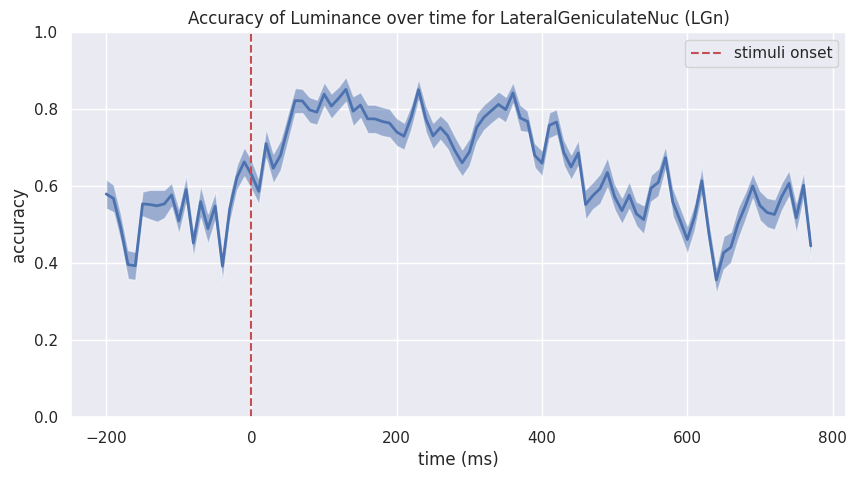

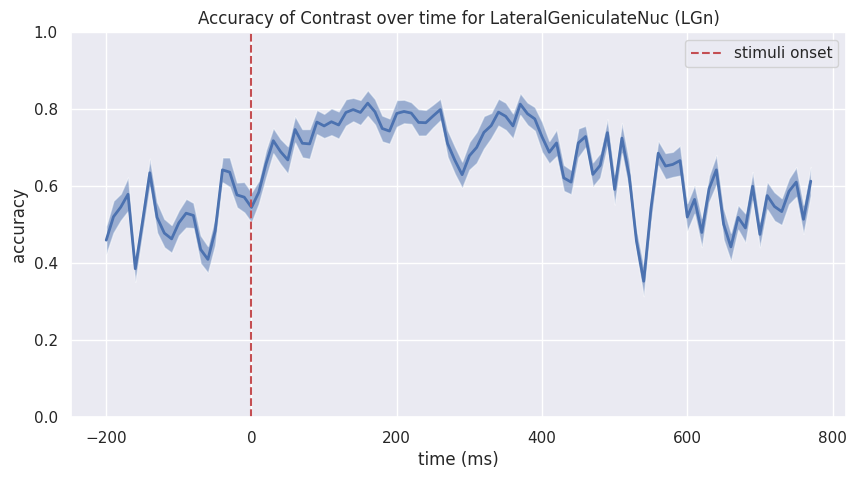

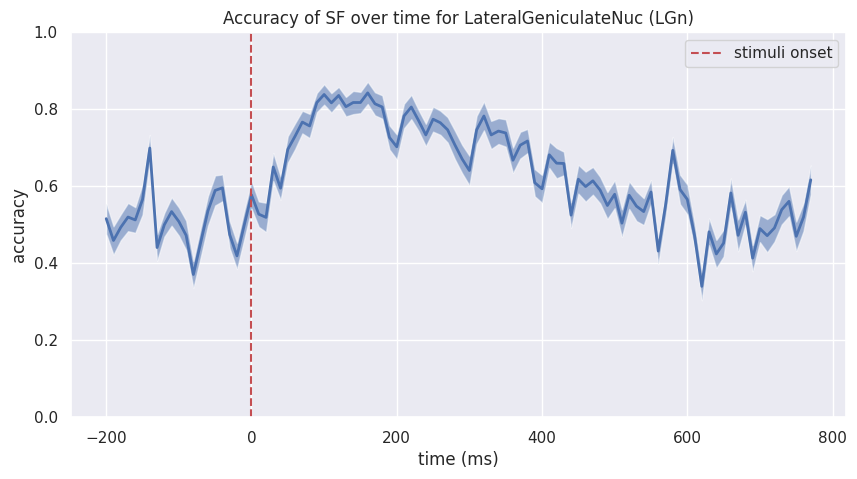

In [10]:
pca = False

for probe in allProbes:
    print("Probe Name: ", probe)
    if pca:
        LLuminanceProbeData = apply_pca(probe_data_extractor(probe_name=probe, image_feature=LLuminanceImages, probe_dict=probeDict, data_path=dataPath))
        HLuminanceProbeData = apply_pca(probe_data_extractor(probe_name=probe, image_feature=HLuminanceImages, probe_dict=probeDict, data_path=dataPath))
        LContrastProbeData  = apply_pca(probe_data_extractor(probe_name=probe, image_feature=LContrastImages, probe_dict=probeDict, data_path=dataPath))
        HContrastProbeData  = apply_pca(probe_data_extractor(probe_name=probe, image_feature=HContrastImages, probe_dict=probeDict, data_path=dataPath))
        LSFProbeData        = apply_pca(probe_data_extractor(probe_name=probe, image_feature=LContrastImages, probe_dict=probeDict, data_path=dataPath))
        HSFProbeData        = apply_pca(probe_data_extractor(probe_name=probe, image_feature=HContrastImages, probe_dict=probeDict, data_path=dataPath))
    else:
        LLuminanceProbeData = probe_data_extractor(probe_name=probe, image_feature=LLuminanceImages, probe_dict=probeDict, data_path=dataPath)
        HLuminanceProbeData = probe_data_extractor(probe_name=probe, image_feature=HLuminanceImages, probe_dict=probeDict, data_path=dataPath)
        LContrastProbeData  = probe_data_extractor(probe_name=probe, image_feature=LContrastImages, probe_dict=probeDict, data_path=dataPath)
        HContrastProbeData  = probe_data_extractor(probe_name=probe, image_feature=HContrastImages, probe_dict=probeDict, data_path=dataPath)
        LSFProbeData        = probe_data_extractor(probe_name=probe, image_feature=LSFImages, probe_dict=probeDict, data_path=dataPath)
        HSFProbeData        = probe_data_extractor(probe_name=probe, image_feature=HSFImages, probe_dict=probeDict, data_path=dataPath)
    
    luminanceAccuracy   = svm(first_data=LLuminanceProbeData, second_data=HLuminanceProbeData, n_iters=100, kernel='linear', C=2.5)
    contrastAccuracy    = svm(first_data=LContrastProbeData, second_data=HContrastProbeData, n_iters=100, kernel='linear', C=2.5)
    SFAccuracy          = svm(first_data=LSFProbeData, second_data=HSFProbeData, n_iters=100, kernel='linear', C=2.5)  
    
    
    plot_accuracy(luminanceAccuracy, probeDict[probe][0], "Luminance")
    save_accuracy(luminanceAccuracy, probeDict[probe][0], "Luminance")
    plot_accuracy(contrastAccuracy, probeDict[probe][0], "Contrast")
    save_accuracy(contrastAccuracy, probeDict[probe][0], "Contrast")
    plot_accuracy(SFAccuracy, probeDict[probe][0], "SF")
    save_accuracy(SFAccuracy, probeDict[probe][0], "SF")